Plotting...


Plotting...
Plotting...
Plotting...
Plotting...
Plotting...
Plotting...
Plotting...
Plotting...
Plotting...
Plotting...
Plotting...
Generating plots for Candidate: gen_0_cand_0, Run: 24-3-25_15sec_EE_gen7_cand22_15secTEST
Generating...
Created folder: /mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.2_test_candidate_gen7_cand22/output/24-3-25_15sec_EE_gen7_cand22_15secTEST/gen_0/gen_0_cand_0
Error loading existing images at: /mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.2_test_candidate_gen7_cand22/output/24-3-25_15sec_EE_gen7_cand22_15secTEST/gen_0/gen_0_cand_0
Loading file /mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.2_test_candidate_gen7_cand22/output/24-3-25_15sec_EE_gen7_cand22_15secTEST/gen_0/gen_0_cand_0_data.json ... 
Loading simConfig...
Loading netParams...
Loading net...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


  Created 400 cells
  Created 13939 connections
  Created 400 stims
Unable to create NEURON objects: 'E'
  Done; re-instantiate net time = 0.48 s
Loading simData...
Plotting recorded cell traces ... trace
Preparing spike data...
Plotting raster...
Plotting 2D representation of network cell locations and connections...
Plotting connectivity matrix...
Preparing spike data...
Generating Param Summary Row...
Key: rate_fitness, Value: 1000.0
Key: BurstVal_fitness, Value: 1.7558523410354825
Key: IBI_fitness, Value: 274.323239550089
Key: baselineFitness, Value: 127.12157230910252
Key: slopeFitness, Value: 1.001918315678168
Key: baseline_diff_fitness, Value: 1000
Key: fitness, Value: 400.70043041931757
Key: average_scaled_fitness, Value: 400.0993789995505
Key: maxFitness, Value: 1000
Saving... /mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.2_test_candidate_gen7_cand22/output/24-3-25_15sec_EE_gen7_cand22_15secTEST/gen_0/gen_0_cand_0/g

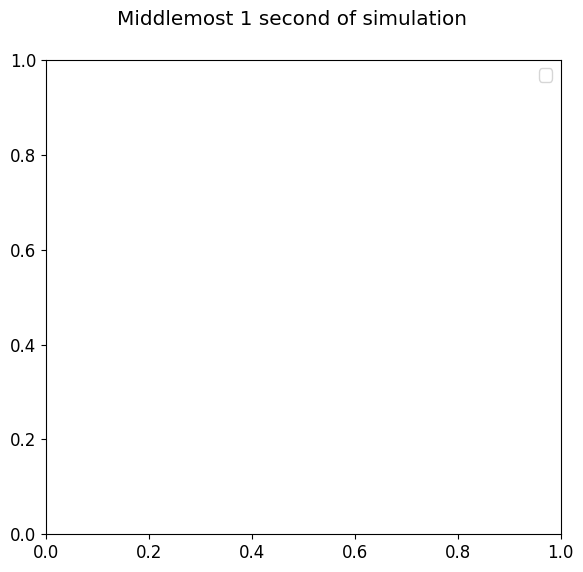

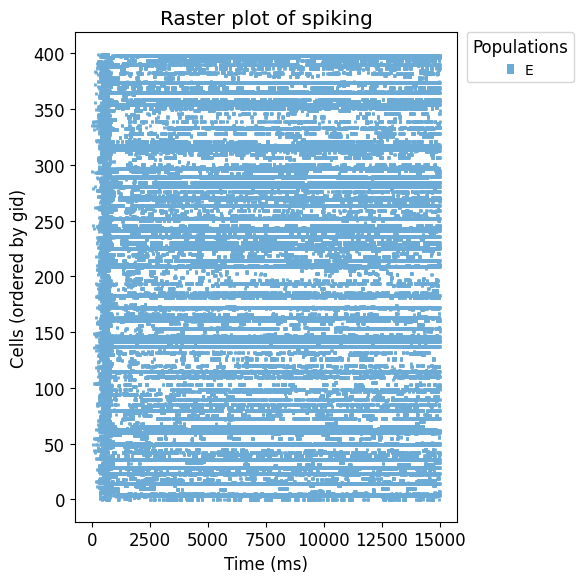

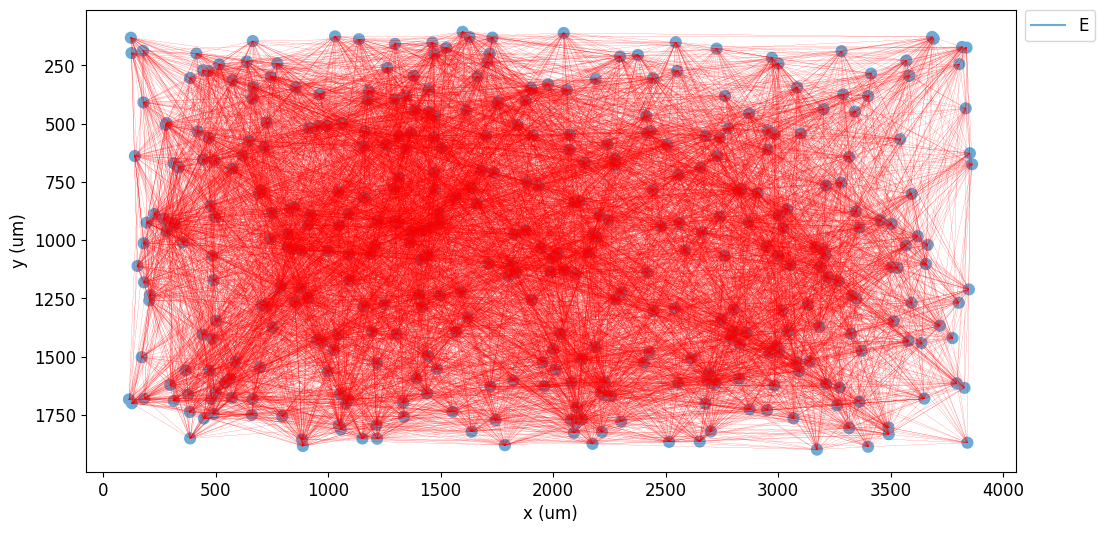

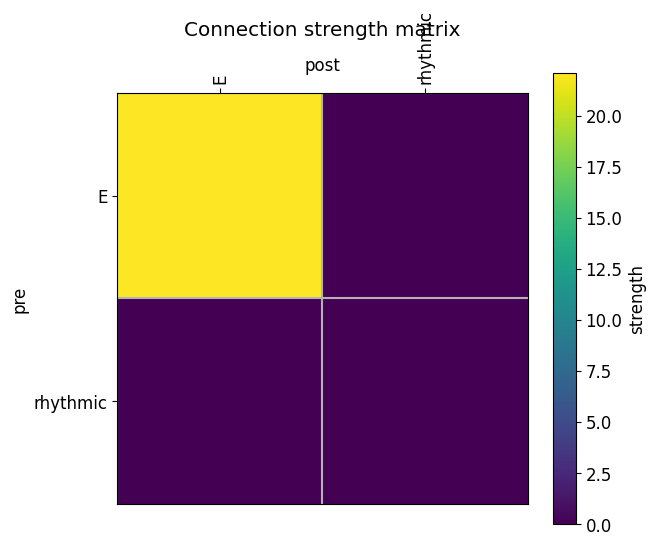

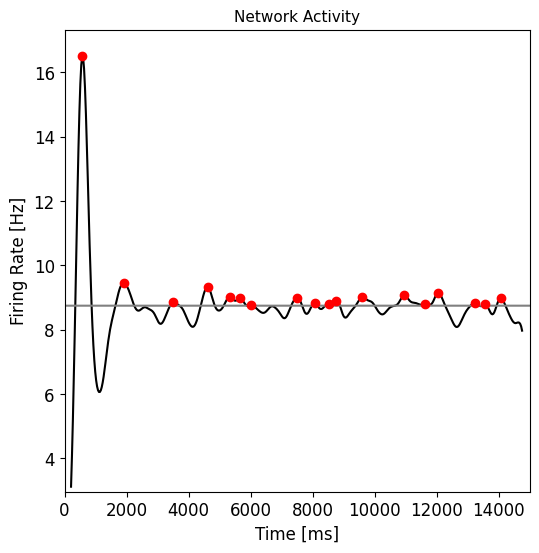

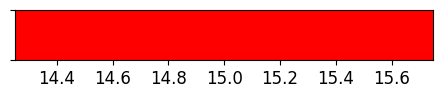

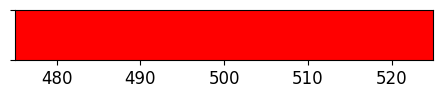

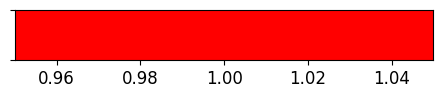

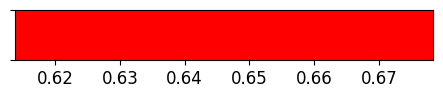

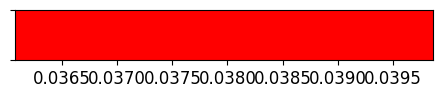

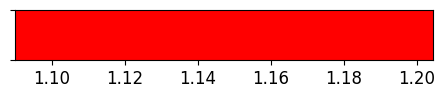

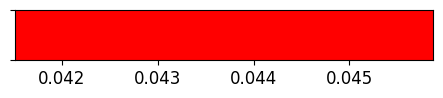

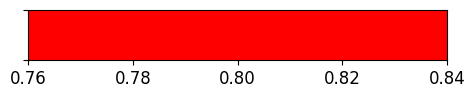

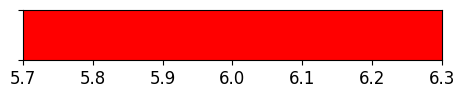

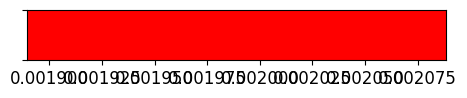

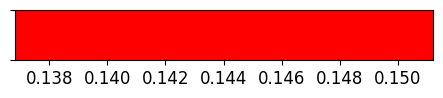

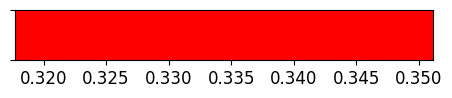

In [1]:
import os
import json

timeout = None
#fitness_thresh = 300
fitness_thresh = None
output_path = '/mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.2_test_candidate_gen7_cand22/output/24-3-25_15sec_EE_gen7_cand22_15secTEST'
for gen_folder in os.listdir(output_path):

    #print(f"Generation Complete. Plotting figures with below threshold fitness: {fitness_thresh}")
    print(f'Plotting...')        
    try: from batch_run_files.plot_config import plot_sim_figs
    except: from plot_config import plot_sim_figs
    batch_run_path = output_path
    gen_path = os.path.join(batch_run_path, gen_folder)
    plot_report_path = f'{output_path}/{gen_folder}/plot_report.json'
    net_activity_params = {'binSize': .03*1000, 'gaussianSigma': .12*1000, 'thresholdBurst': 1.0}
    plot_report = plot_sim_figs(gen_path, fitness_threshold = fitness_thresh, simLabel = None, net_activity_params = net_activity_params, timeout = timeout)
    if len(plot_report) > 0:    
        with open(plot_report_path, 'w') as f:
            json.dump(plot_report, f)

In [2]:
## Prepare Folder for Roy
import shutil
import os
import fnmatch

#output_path = '/mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.0_optimizing_75-25/output'
output_path = '/mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.2_test_candidate_gen7_cand22/output'
reports_path = '/mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.2_test_candidate_gen7_cand22/reports'
#reports_path = '/mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.0_optimizing_75-25/reports'
overwrite = False

#walk through output_path, find all .svg and .png files, copy to new folder
for root, dirs, files in os.walk(output_path):
    if '.archive' in root: continue
    for file in files:
        report_file_types = ['.svg', '.png', '.pdf', '.csv', '.run', '.err', '.json', '.log']
        image_file_types = ['.svg', '.png'] 
        info_file_types = ['.pdf', 
                           #'.csv', 
                           '.run', '.err', '.json', '.log'] 
        if file.endswith(tuple(report_file_types)):
            file_path = os.path.join(root, file)
            new_path = file_path.replace(output_path, reports_path)
            new_dir = os.path.dirname(new_path)

            if file.endswith(tuple(info_file_types)):
               # Split the file path into directories
                directories = file_path.split(os.sep)
                # Check if any directory matches the pattern "gen_*"
                if any(fnmatch.fnmatch(dir, 'gen_*') for dir in directories):
                    continue  # Skip info files in gen folders
                new_dir = os.path.join(new_dir, 'batch_run_files')
                new_path = os.path.join(new_dir, file)
            
            #If file name contains "param_summary_row", copy to the grandparent folder instead
            if 'param_summary_row.png' in file:
                new_dir = os.path.dirname(new_dir)
                new_dir = os.path.dirname(new_dir)
                new_path = os.path.join(new_dir, file)
            
            #If file name contains ".csv"
            if '.csv' in file:
                #new_dir = os.path.dirname(new_dir)
                new_path = os.path.join(new_dir, file)

            #make sure the new directory exists
            if not os.path.exists(new_dir):
                os.makedirs(new_dir)
            if not os.path.exists(new_path) and overwrite is False:
                shutil.copy(file_path, new_path)
                print(f'Copied {file_path} to {new_path}')
            elif overwrite is True:
                shutil.copy(file_path, new_path)
                print(f'Copied {file_path} to {new_path}')

Copied /mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.1_optimizing_EEonly/output/24-3-24_5sec_EEsearch/gen_16/gen_16_cand_1/gen_16_cand_1__param_summary_row.png to /mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.1_optimizing_EEonly/reports/24-3-24_5sec_EEsearch/gen_16_cand_1__param_summary_row.png
Copied /mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.1_optimizing_EEonly/output/24-3-24_5sec_EEsearch/gen_16/gen_16_cand_1/gen_16_cand_1__raster.png to /mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.1_optimizing_EEonly/reports/24-3-24_5sec_EEsearch/gen_16/gen_16_cand_1/gen_16_cand_1__raster.png
Copied /mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.1_optimizing_EEonly/output/24-3-24_5sec_EEsear